# Project 1

Read and inspect the data.

In [33]:
from pandas import read_csv, DataFrame
data = read_csv('slump_test.data')
data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


Looking at the first 5 rows of the data, the `No` column is just a label on the instance which is irrelevant. Therefore it will be dropped along with the 2 output variables.

In [34]:
data.drop(columns=['No', 'SLUMP(cm)', 'FLOW(cm)'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


Define a function to plot a scatter matrix with all the features except for the last one being the output variable.

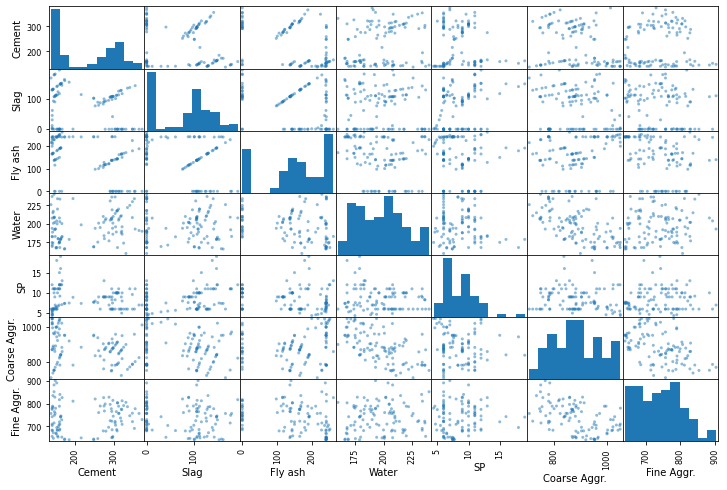

In [35]:
from matplotlib.pyplot import savefig, show
from pandas.plotting import scatter_matrix
def visualise_data(data: DataFrame):
	scatter_matrix(data[data.columns[:-1]], figsize=(12, 8))
	savefig("scatter_matrix_plot")
	show()
visualise_data(data)

Looking at the scatter plot, none of the features are linearly correlated. Now define a function that takes in both training and test data and return them after scaling.

In [36]:
from sklearn.preprocessing import StandardScaler
from numpy import ndarray
def feature_scale(x_train: DataFrame, x_test: DataFrame) -> tuple[ndarray, ndarray]:
	scaler = StandardScaler()
	return scaler.fit_transform(x_train), scaler.transform(x_test)

Perform a 80/20 random split on the dataset to form a training set and a test set and apply feature scaling since SVMs are sensitive to scale. 

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data.iloc[:, -1], test_size=0.2)
X_train, X_test = feature_scale(x_train, x_test)

Use `linear kernel` for `SVR` as linear models perform quite well in this case, also lower the `alpha` value for `SGD` to reduce the regularisaton strength. Set `n_jobs` to -1 so that all processors can be used to train the `Voting` regressor.

In [38]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
lin = LinearRegression()
lin.fit(X_train, y_train)
sgd = SGDRegressor(alpha=0.0000001)
sgd.fit(X_train, y_train)
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
voting = VotingRegressor([('lin', lin), ('sgd', sgd), ('svr', svr)], n_jobs=-1)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('lin', LinearRegression()),
                            ('sgd', SGDRegressor(alpha=1e-07)),
                            ('svr', SVR(kernel='linear'))],
                n_jobs=-1)

Define a function to report RMSE given the ground truth and predicted values and generate a scatter plot with predicted values along the x axis and true values along the y axis, as well as a `y = x` line representing the intended outcome where the further the points are away from the line the bigger the error is.

In [39]:
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import scatter, plot
from numpy import linspace
def rmse_report(y_true: ndarray, y_pred: ndarray) -> float:
	scatter(y_pred, y_true)
	x = linspace(y_true.min(), y_true.max())
	plot(x, x)
	savefig("scatter_plot")
	show()
	return mean_squared_error(y_true, y_pred, squared=False)

Looking at the RMSE report and scatter plots all the base estimators already perform pretty well and quite similar resulting the `Voting` regressor barely make any improvements.

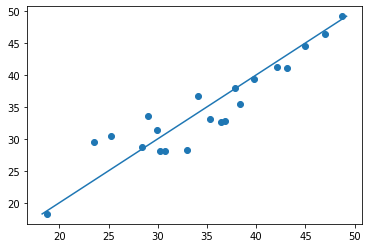

Linear Regressor: 2.891116135304602


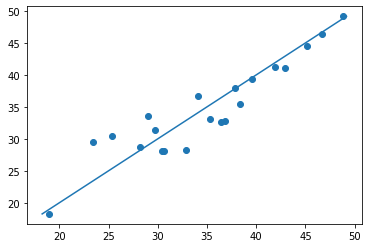

Stochastic Gradient Decend Regressor: 2.877195238559864


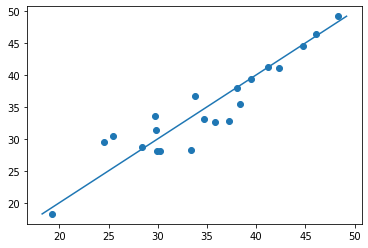

Support Vector Machine Regressor: 2.6967002487156124


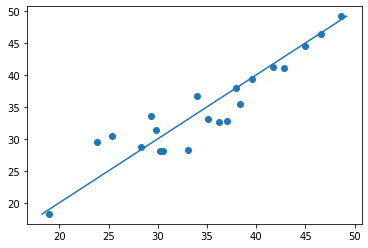

Voting Regressor: 2.8107294310891113


In [40]:
print(f'Linear Regressor: {rmse_report(y_test, lin.predict(X_test))}')
print(f'Stochastic Gradient Decend Regressor: {rmse_report(y_test, sgd.predict(X_test))}')
print(f'Support Vector Machine Regressor: {rmse_report(y_test, svr.predict(X_test))}')
print(f'Voting Regressor: {rmse_report(y_test, voting.predict(X_test))}')

# Project 2

Read and inspect the data. Since the provided csv file has no feature names, the first row is already the actual data, `header` is set to `None` and the attribute names are therefore just the indice of the columns starting from 0.

In [41]:
from pandas import read_csv, DataFrame
data = read_csv('abalone.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Looking at the first 5 rows of the data, `Sex` needs to be converted from text to 0, 1 and 2 representing male, female and infant.

In [42]:
data.replace({'M': 0, 'F': 1, 'I': 2}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   int64  
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Now all the attributes only contain numeric values that are non-null, move on to feature selection.

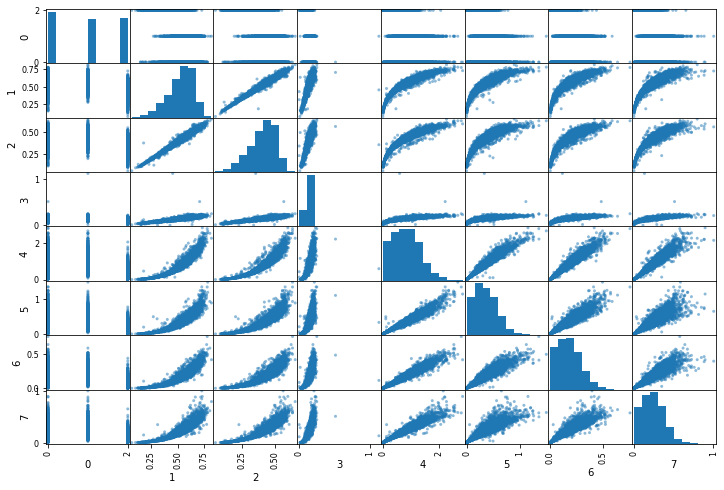

,0,1,2,3,4,5,6,7
0,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549
1,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
2,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
3,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
4,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
5,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
6,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
7,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [43]:
visualise_data(data)
data[data.columns[:-1]].corr()

Looking at the scatter plot, features 1, 2 and 4, 5 are strongly correlated linearly. Consulting the correlation matrix they all have a value greater than 0.96. Feature 4 is also linearly correlated to 6 and 7, however the correlations are weaker between 5, 6 and 7, so features 2 and 4 will be dropped.

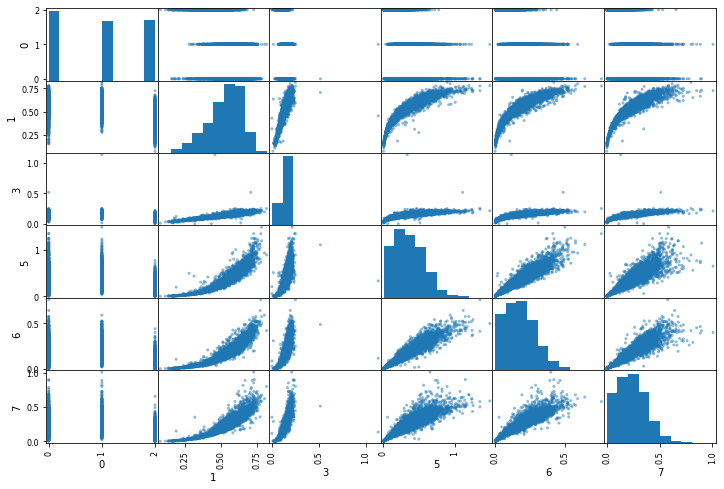

,0,1,3,5,6,7
0,1.000000,-0.448765,-0.417928,-0.440927,-0.454658,-0.445549
1,-0.448765,1.000000,0.827554,0.897914,0.903018,0.897706
3,-0.417928,0.827554,1.000000,0.774972,0.798319,0.817338
5,-0.440927,0.897914,0.774972,1.000000,0.931961,0.882617
6,-0.454658,0.903018,0.798319,0.931961,1.000000,0.907656
7,-0.445549,0.897706,0.817338,0.882617,0.907656,1.000000


In [44]:
data.drop(columns=[2, 4], inplace=True)
visualise_data(data)
data[data.columns[:-1]].corr()

Now none of the correlation value is greater than 0.95, define a function that predicts the rings given a trained estimator and the test data. As the ring values must be integers, the predicted results are rounded to the nearest integer before returning. 

In [45]:
from sklearn.base import BaseEstimator
def predict_rings(estimator: BaseEstimator, x_test) -> list:
	return list(map(round, estimator.predict(x_test)))

Do an 85/15 random split to form a training set and a test set and train a `Random Forest` regressor with 500 estimators. Keep `max_features` to be 1 sine the number of features are quite small, but change `max_samples` to 0.5 so that only half of the data are used for every `Decision Tree`.

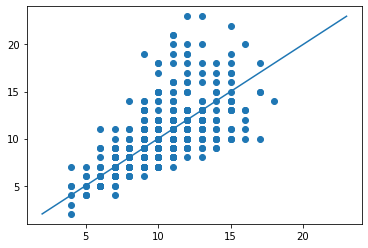

2.3378857390530494

In [46]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data.iloc[:, -1], test_size=0.15)
forest = RandomForestRegressor(500, max_samples=0.5, n_jobs=-1, random_state=42)
forest.fit(x_train, y_train)
rmse_report(y_test, predict_rings(forest, x_test))

Print out the `feature importances` obtained from the training process. `Sex` should be removed as it only has an `importance` value of 3%. The total `feature importance` value that is retained after the dimension reduction step should be around 96%.

In [47]:
feature_importances = forest.feature_importances_
for name, feature_importance in zip(x_train.columns.map(lambda i: ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'][i]), feature_importances):
	print(f'{name}: {feature_importance}')
print(sum(filter(lambda feature_importance: feature_importance > 0.05, feature_importances)))

Sex: 0.03305092528720387
Length: 0.07250555711142936
Height: 0.06750369203978752
Shucked: 0.1926995139216875
Viscera: 0.09584590419781333
Shell: 0.5383944074420784
0.9669490747127961


Update both the training and test data by only retaining the features whose `importance` values are above 5%.

In [48]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(forest, threshold=0.05, prefit=True)
X_train = selector.transform(x_train)
X_test = selector.transform(x_test)

Comparing the RMSE value for the two `Random Forest` regressors, there is a slight increase after removing the lower `importance` features. Looking at the true values vs predicted values plot, the large ring values do tend to have a larger squared errors as they are further away from the diagonal line.

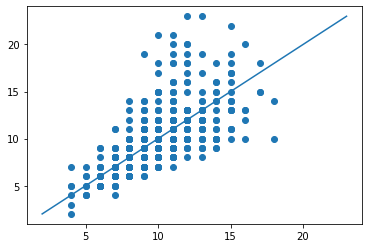

2.3426562439914145

In [51]:
forest.fit(X_train, y_train)
rmse_report(y_test, predict_rings(forest, X_test))

Feature scale both training and test set before implementing a `Bagging` regressor with 500 `SVM` regressors. Compare its RMSE of the predictions for the full-dimensional test set with the first `Random Forest` regressor which has the same number of features, the `Bagging` regressor has a slightly lower value. The only difference between them is the base estimator one being `SVR` and the other being `Decision Tree`.

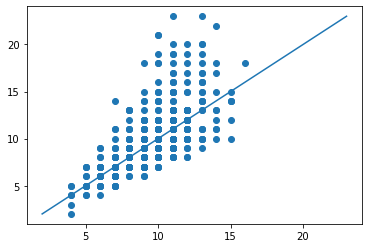

2.306982674189636

In [59]:
from sklearn.ensemble import BaggingRegressor
X_train, X_test = feature_scale(x_train, x_test)
bagging = BaggingRegressor(SVR(), 500, max_samples=0.5, n_jobs=-1, random_state=42)
bagging.fit(X_train, y_train)
rmse_report(y_test, predict_rings(bagging, X_test))